In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [18]:
# While importing the csv, enable date parsing in the date specific columns
# Also convert all hardcoded NA values to python specific np.NaN using na_values
df = pd.read_csv('C:\\Users\\hp\\Desktop\\Uber Request Data.csv', parse_dates=[4,5], dayfirst=True, na_values="NA")


In [19]:
df.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2        1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  
0 2016-07-11 13:00:00  
1 2016-07-11 18:47:00  
2 2016-07-12 09:58:00  
3 2016-07-12 22:03:00  
4 2016-07-13 09:25:47

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [5]:
# Extract hour from the Request timestamp
df["RequestHour"] = df["Request timestamp"].dt.hour
df["RequestHour"]

0       11
1       17
2        9
3       21
4        8
5       21
6        6
7        5
8       17
9        6
10       5
11      12
12       4
13       8
14      14
15      17
16      12
17      22
18      10
19      18
20      11
21      15
22      18
23       8
24      21
25      21
26       2
27      10
28      13
29       6
        ..
6715    22
6716    22
6717    22
6718    22
6719    22
6720    22
6721    22
6722    22
6723    22
6724    23
6725    23
6726    23
6727    23
6728    23
6729    23
6730    23
6731    23
6732    23
6733    23
6734    23
6735    23
6736    23
6737    23
6738    23
6739    23
6740    23
6741    23
6742    23
6743    23
6744    23
Name: RequestHour, Length: 6745, dtype: int64

In [6]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night
df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning" if x<=9 else ("Noon" if x<=16 else ("Late Evening" if x<=21 else "Night"))))

df["TimeSlot"]

0                Noon
1        Late Evening
2       Early Morning
3        Late Evening
4       Early Morning
5        Late Evening
6       Early Morning
7       Early Morning
8        Late Evening
9       Early Morning
10      Early Morning
11               Noon
12               Dawn
13      Early Morning
14               Noon
15       Late Evening
16               Noon
17              Night
18               Noon
19       Late Evening
20               Noon
21               Noon
22       Late Evening
23      Early Morning
24       Late Evening
25       Late Evening
26               Dawn
27               Noon
28               Noon
29      Early Morning
            ...      
6715            Night
6716            Night
6717            Night
6718            Night
6719            Night
6720            Night
6721            Night
6722            Night
6723            Night
6724            Night
6725            Night
6726            Night
6727            Night
6728            Night
6729      

In [7]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand
df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")
df.head(20)

Request id Pickup point  Driver id          Status   Request timestamp  \
0          619      Airport        1.0  Trip Completed 2016-07-11 11:51:00   
1          867      Airport        1.0  Trip Completed 2016-07-11 17:57:00   
2         1807         City        1.0  Trip Completed 2016-07-12 09:17:00   
3         2532      Airport        1.0  Trip Completed 2016-07-12 21:08:00   
4         3112         City        1.0  Trip Completed 2016-07-13 08:33:16   
5         3879      Airport        1.0  Trip Completed 2016-07-13 21:57:28   
6         4270      Airport        1.0  Trip Completed 2016-07-14 06:15:32   
7         5510      Airport        1.0  Trip Completed 2016-07-15 05:11:52   
8         6248         City        1.0  Trip Completed 2016-07-15 17:57:27   
9          267         City        2.0  Trip Completed 2016-07-11 06:46:00   
10        1467      Airport        2.0  Trip Completed 2016-07-12 05:08:00   
11        1983         City        2.0  Trip Completed 2016-07-12 12:30:00   
12        2784      Airport        2.0  Trip Completed 2016-07-13 04:49:20   
13        3075         City        2.0  Trip Completed 2016-07-13 08:02:53   
14        3379         City        2.0  Trip Completed 2016-07-13 14:23:02   
15        3482      Airport        2.0  Trip Completed 2016-07-13 17:23:18   
16        4652         City        2.0  Trip Completed 2016-07-14 12:01:02   
17        5335      Airport        2.0  Trip Completed 2016-07-14 22:24:13   
18         535      Airport        3.0  Trip Completed 2016-07-11 10:00:00   
19         960      Airport        3.0  Trip Completed 2016-07-11 18:45:00   

        Drop timestamp  RequestHour       TimeSlot Cab Availability  
0  2016-07-11 13:00:00           11           Noon        Available  
1  2016-07-11 18:47:00           17   Late Evening        Available  
2  2016-07-12 09:58:00            9  Early Morning        Available  
3  2016-07-12 22:03:00           21   Late Evening        Available  
4  2016-07-13 09:25:47            8  Early Morning        Available  
5  2016-07-13 22:28:59           21   Late Evening        Available  
6  2016-07-14 07:13:15            6  Early Morning        Available  
7  2016-07-15 06:07:52            5  Early Morning        Available  
8  2016-07-15 18:50:51           17   Late Evening        Available  
9  2016-07-11 07:25:00            6  Early Morning        Available  
10 2016-07-12 06:02:00            5  Early Morning        Available  
11 2016-07-12 12:57:00           12           Noon        Available  
12 2016-07-13 05:23:03            4           Dawn        Available  
13 2016-07-13 09:16:19            8  Early Morning        Available  
14 2016-07-13 15:35:18           14           Noon        Available  
15 2016-07-13 18:20:51           17   Late Evening        Available  
16 2016-07-14 12:36:46           12           Noon        Available  
17 2016-07-14 23:18:52           22          Night        Available  
18 2016-07-11 10:31:00           10           Noon        Available  
19 2016-07-11 19:23:00           18   Late Evening        Available

Text(0.5,1,'Frequency of Requests by Hour')

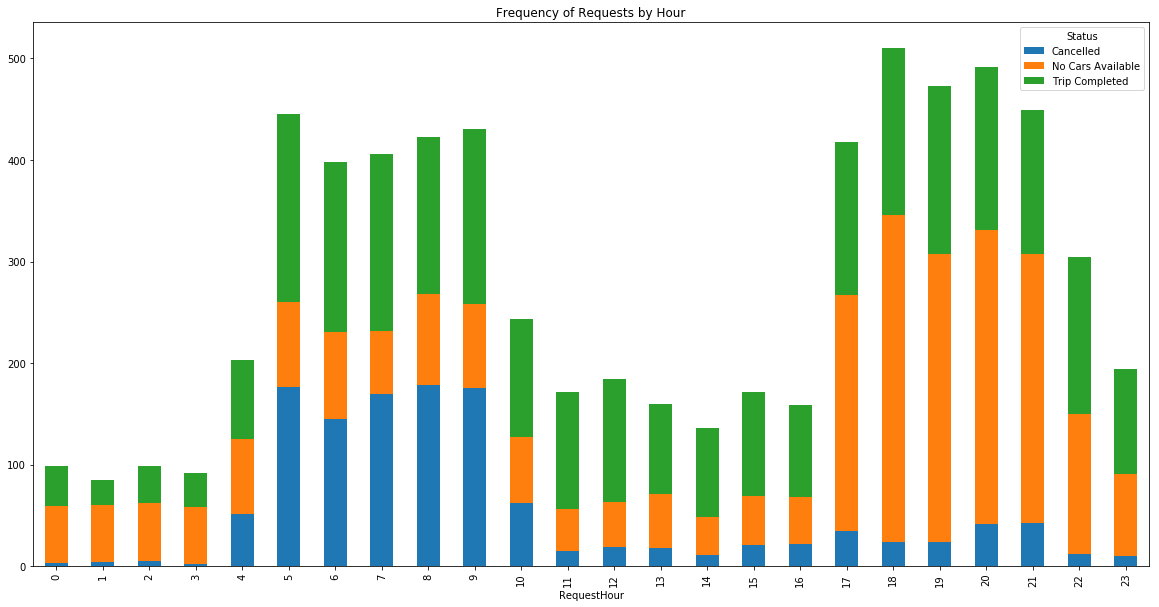

In [8]:
# Frequency of Requests by Hour
df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Frequency of Requests by Hour')


Text(0,0.5,'')

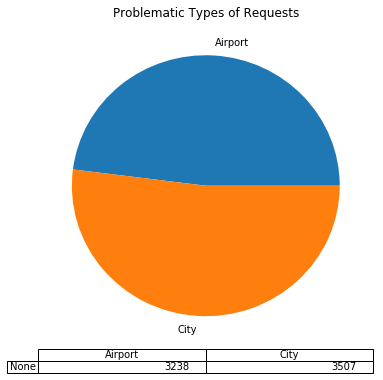

In [9]:
#  Most problematic types of Requests
df.groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic Types of Requests")
plt.ylabel("")


Text(0,0.5,'')

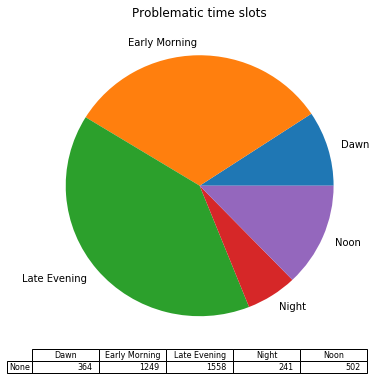

In [10]:
# Most Problematic time slots 
df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic time slots")
plt.ylabel("")


Text(0.5,1,'Demand-Supply Gap from Airport to City')

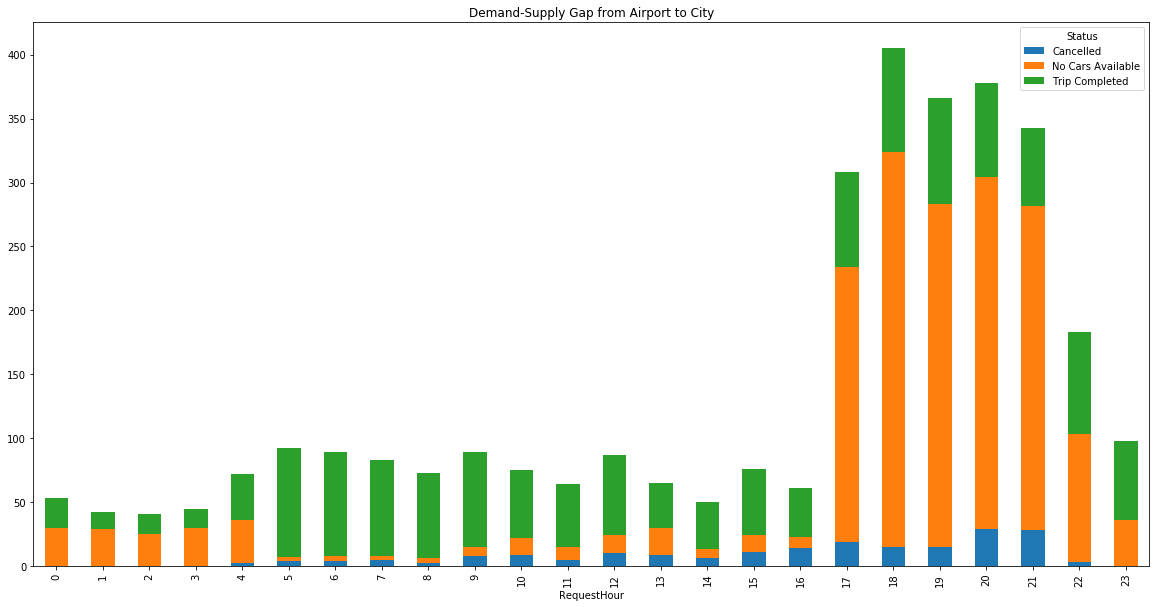

In [11]:
# Demand-Supply Gap from Airport to City
df[(df['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Demand-Supply Gap from Airport to City')



Text(0.5,1,'Demand-Supply Gap from City to Airport')

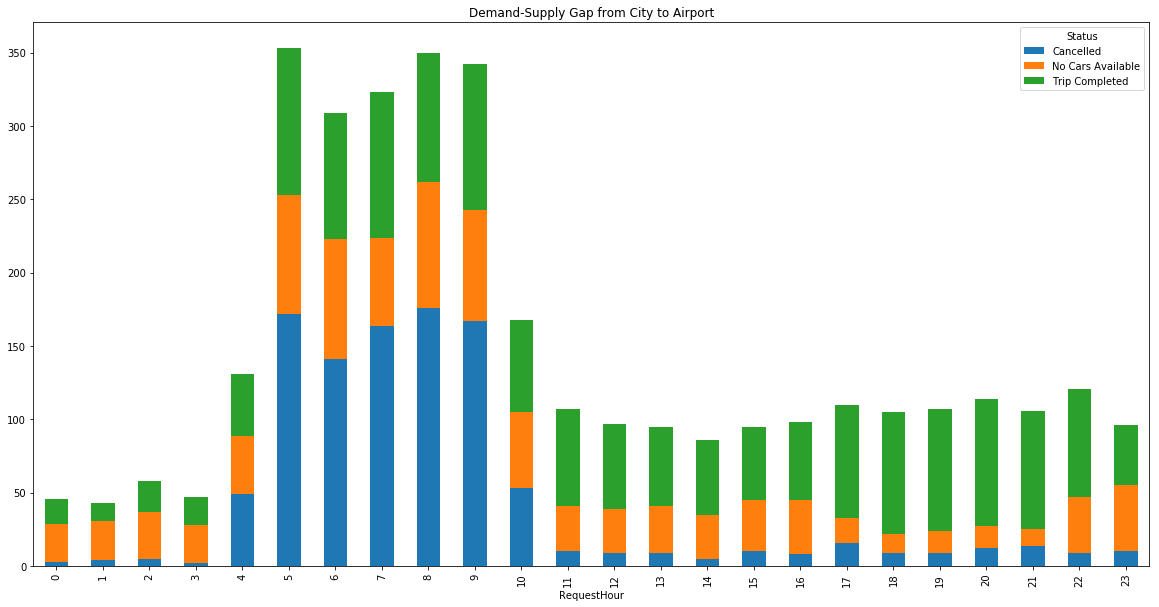

In [12]:
# Demand-Supply Gap from City to Airport
df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Demand-Supply Gap from City to Airport')

Text(0.5,1,'Time slots where highest Gap exists')

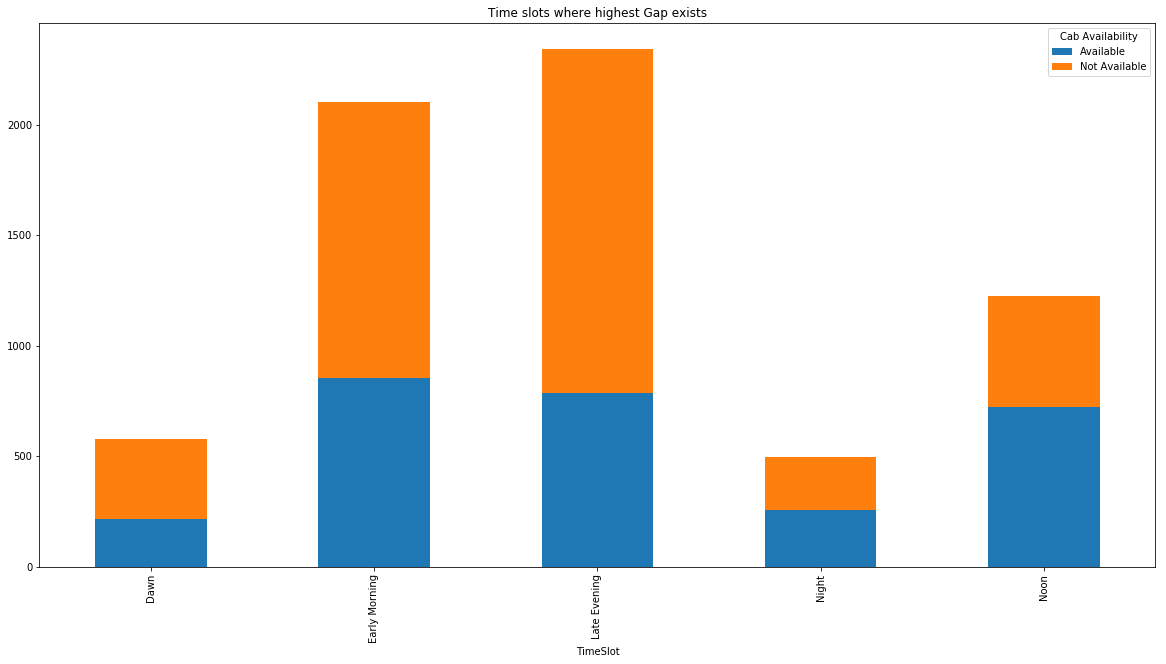

In [13]:
# Time slots where highest Gap exists
df.groupby(['TimeSlot','Cab Availability']).size().unstack().plot(kind='bar', stacked=True,figsize=(20, 10))
plt.title('Time slots where highest Gap exists')

Text(0,0.5,'')

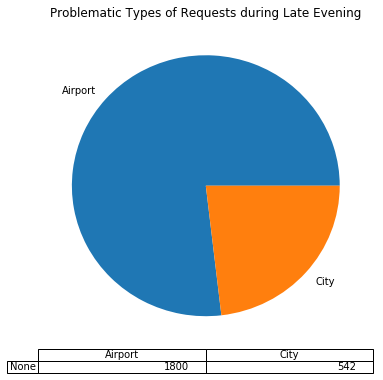

In [14]:
#  Types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
df[df["TimeSlot"]=="Late Evening"].groupby(['Pickup point']).size().plot(kind="pie",stacked=True,figsize=(6, 6),table=True,title="Problematic Types of Requests during Late Evening")
plt.ylabel("")

